In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Mother occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
df.shape

(4424, 35)

In [5]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother qualification                            4424 non-null   int64  
 8   Father qualification                            4424 non-null   int64  
 9   Mother occupation                        

In [7]:
df['Target']=df['Target'].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance                      4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Nationality                                     4424 non-null   int64   
 7   Mother qualification                            4424 non-null   int64   
 8   Father qualification                            4424 non-null   int64   
 9   Mother occupation             

In [9]:
demographic_data=df[['Marital status','Nationality', 'Displaced', 'Gender', 'Age at enrollment', 'International'] ]
socioeconomic_data=df[['Mother qualification', 'Father qualification', 'Mother occupation', 'Father occupation', 'Educational special needs','Debtor', 'Tuition fees up to date', 'Scholarship holder']]
macroeconomics_data=df[['Unemployment rate', 'Inflation rate', 'GDP']]
academic_data=df[['Application mode', 'Application order', 'Course','Daytime/evening attendance','Previous qualification' ]]
first_semester=df[['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)'
                , 'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)']]
second_semester=df[['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)'
                , 'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]

In [10]:
demographic_data.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
Marital status,1.178571,0.605747,1.0,6.0
Nationality,1.254521,1.748447,1.0,21.0
Displaced,0.548373,0.497711,0.0,1.0
Gender,0.351718,0.477560,0.0,1.0
Age at enrollment,23.265145,7.587816,17.0,70.0
International,0.024864,0.155729,0.0,1.0


In [11]:
socioeconomic_data.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
Mother qualification,12.322107,9.026251,1.0,29.0
Father qualification,16.455244,11.044800,1.0,34.0
Mother occupation,7.317812,3.997828,1.0,32.0
Father occupation,7.819168,4.856692,1.0,46.0
Educational special needs,0.011528,0.106760,0.0,1.0
Debtor,0.113698,0.317480,0.0,1.0
Tuition fees up to date,0.880651,0.324235,0.0,1.0
Scholarship holder,0.248418,0.432144,0.0,1.0


In [12]:
#Young Adults (17-25); Early Career (26-35); Mid Career (36-45); Late Career (46-60); Senior (61-70).
age_bins = [17, 25, 35, 45, 60, 70]
age_labels = ['Young Adults', 'Early Career', 'Mid Career', 'Late Career', 'Senior']
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=age_bins, labels=age_labels)
df['Age Group'].value_counts()

Age Group
Young Adults    3374
Early Career     653
Mid Career       279
Late Career      110
Senior             3
Name: count, dtype: int64

<Axes: xlabel='Age Group', ylabel='count'>

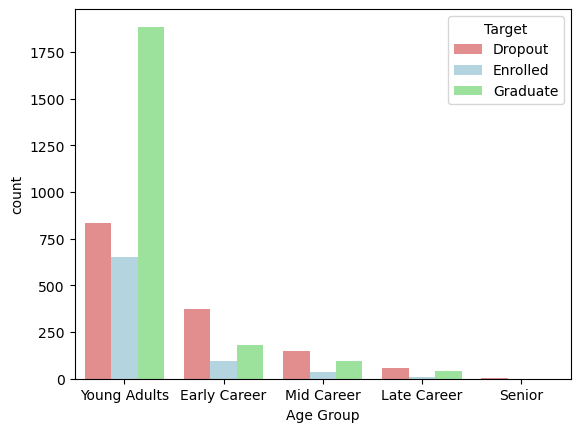

In [13]:
target= df['Target'].value_counts()
colors={
    'Graduate': 'lightgreen',
    'Enrolled': 'lightblue', 
    'Dropout': 'lightcoral'
}

sns.countplot(x=df['Age Group'], hue=df['Target'], palette=colors)

### Distribution of Students by Target Status

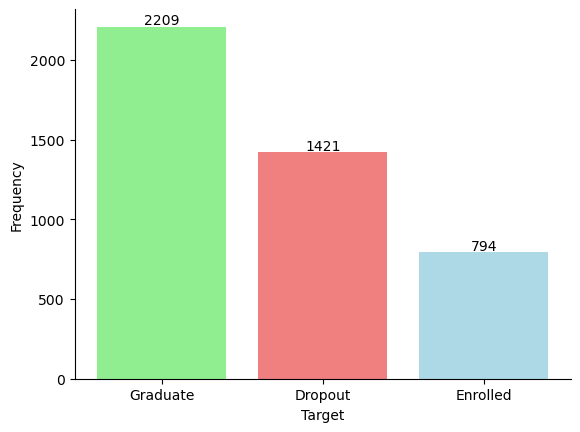

In [14]:
target= df['Target'].value_counts()

bar_colors = [colors[label] for label in target.index]

plt.bar(target.index, target.values, color=bar_colors)

for i,value in enumerate(target.values):
    plt.text(i, value+15,str(value), ha='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

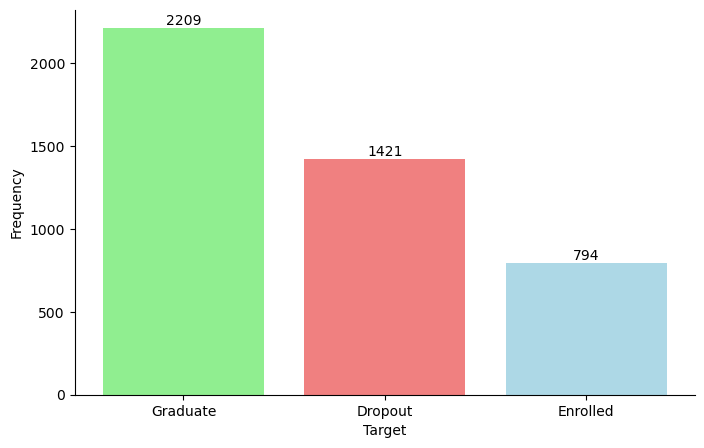

In [15]:
#Another way using subplot 
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(target.index, target.values, color=bar_colors)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

ax.spines[['right', 'top']].set_visible(False)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [16]:
gender_target=df.groupby(['Gender', 'Target']).size().unstack(fill_value=0)
gender_target_percentage =gender_target.div(gender_target.sum(axis=1), axis=0) * 100

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15916\2078514153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_target=df.groupby(['Gender', 'Target']).size().unstack(fill_value=0)


In [17]:
gender_target_percentage

Target,Dropout,Enrolled,Graduate
Gender,,,
0,25.104603,16.980474,57.914923
1,45.051414,19.730077,35.218509


In [18]:
gender_target_percentage.shape

(2, 3)

### Educational Outcomes by Gender

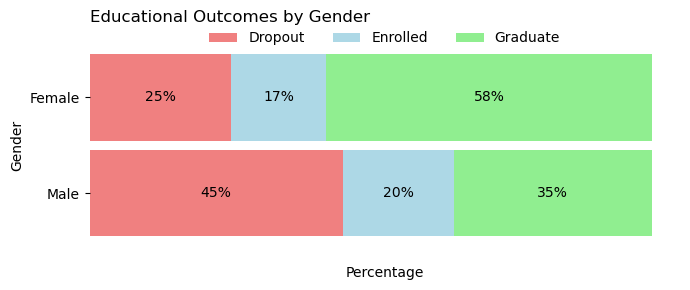

In [19]:
fig, ax = plt.subplots(figsize=(7, 3))

gender_target_percentage.plot(kind='barh',stacked=True, color=colors,width=0.9,ax=ax)
for container in ax.containers:
    ax.bar_label(container,  fmt='%.0f%%' ,label_type='center')

ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.05),ncol=3, frameon=False)
plt.xlabel('Percentage')
plt.xticks([])
ax.invert_yaxis()
plt.yticks(ticks=range(len(gender_target_percentage.index)),labels=['Female','Male'])
plt.title('Educational Outcomes by Gender', loc='left')
plt.tight_layout()
plt.show()

In [20]:
course_target=df.groupby(['Course','Target']).size().unstack(fill_value=0)
course_target_percentage=course_target.div(course_target.sum(axis=1), axis=0)*100

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15916\452637876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  course_target=df.groupby(['Course','Target']).size().unstack(fill_value=0)


In [21]:
course_target_percentage

Target,Dropout,Enrolled,Graduate
Course,,,
1,66.666667,25.000000,8.333333
2,38.139535,17.209302,44.651163
3,33.023256,9.767442,57.209302
4,40.952381,17.619048,41.428571
5,22.566372,18.584071,58.849558
6,26.706231,22.255193,51.038576
7,54.117647,37.647059,8.235294
8,55.319149,14.893617,29.787234
9,35.263158,28.421053,36.315789


In [22]:
course_labels = [
    "Biofuel Production Technologies",
    "Animation and Multimedia Design",
    "Social Service (evening attendance)",
    "Agronomy",
    "Communication Design",
    "Veterinary Nursing",
    "Informatics Engineering",
    "Equiniculture",
    "Management",
    "Social Service",
    "Tourism",
    "Nursing",
    "Oral Hygiene",
    "Advertising and Marketing Management",
    "Journalism and Communication",
    "Basic Education",
    "Management (evening attendance)"
]

### Percentage Distribution of Students by Target Status across Various Programs

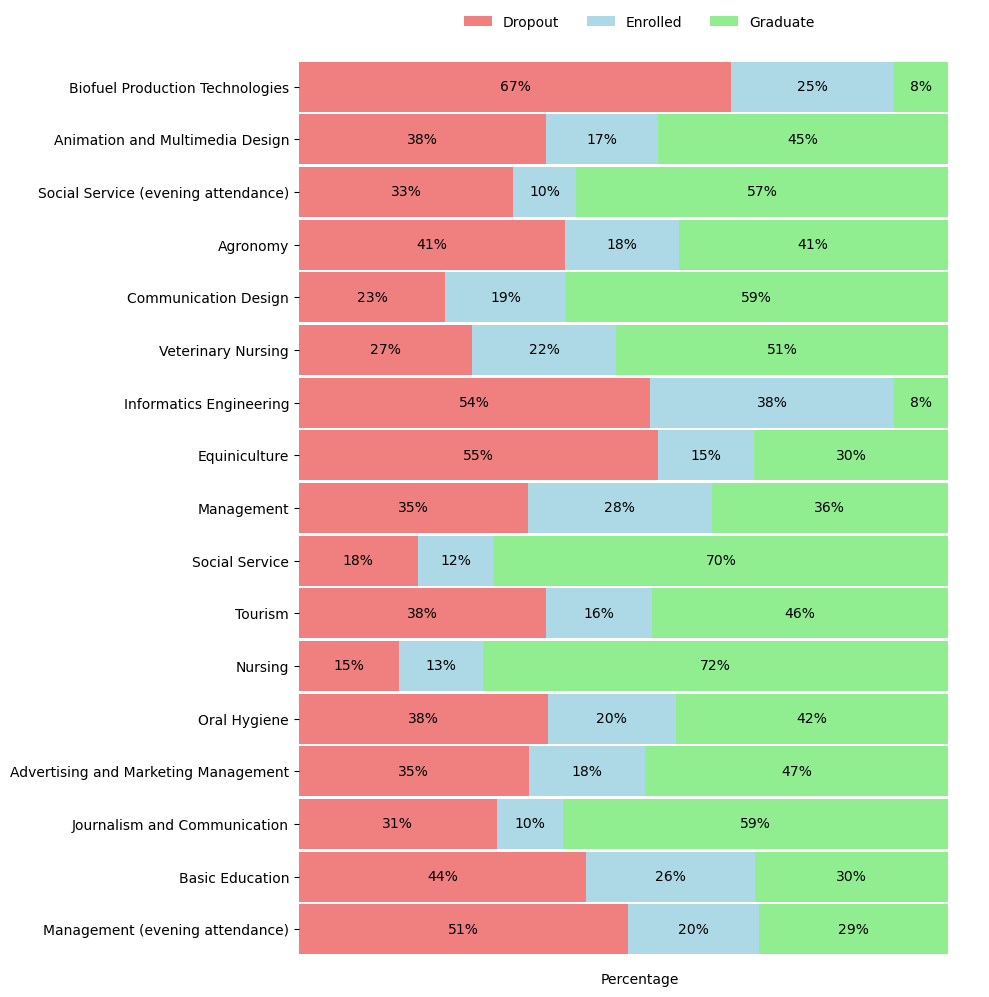

In [23]:
fig, ax= plt.subplots(figsize=(10,10))

course_target_percentage.plot(kind='barh', stacked=True, color=colors,width=0.95 ,ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')

plt.legend(title='',loc='upper center',bbox_to_anchor=(0.5,1.05) ,ncols=3, frameon=False)
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.ylabel('')
plt.yticks(range(len(course_labels)), labels=course_labels)
ax.invert_yaxis()
plt.xlabel('Percentage')
plt.xticks([])
plt.tight_layout()
plt.show()

In [24]:
def group_by_div(x,y):
    a=df.groupby([x,y], observed=False).size().unstack(fill_value=0)
    b=a.div(a.sum(axis=1), axis=0)*100
    return b

In [25]:
displaced_target_percentage=group_by_div('Displaced', 'Target')
displaced_target_percentage

Target,Dropout,Enrolled,Graduate
Displaced,,,
0,37.637638,18.068068,44.294294
1,27.576257,17.848310,54.575433


In [26]:
def barh_compare(percentage_table, y_labels):
    fig, ax= plt.subplots(figsize=(8,len(percentage_table) * 1.2))

    percentage_table.plot(kind='barh', stacked=True, color=colors,width=0.9,ax=ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', label_type='center')

    plt.legend(title='',loc='upper center',bbox_to_anchor=(0.5,1.05) ,ncols=3, frameon=False)
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

    plt.ylabel('')
    plt.yticks(range(len(y_labels)), labels=y_labels)
    ax.invert_yaxis()
    plt.xlabel('')
    plt.xticks([])
    plt.tight_layout()
    plt.show()

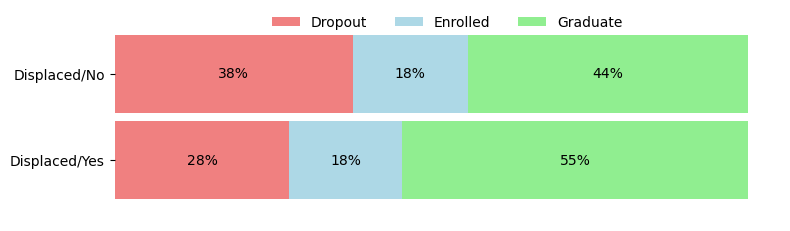

In [27]:
barh_compare(displaced_target_percentage, y_labels=['Displaced/No', 'Displaced/Yes'])

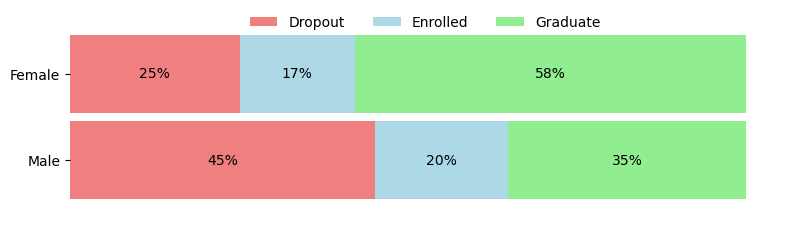

In [28]:
barh_compare(gender_target_percentage, y_labels=['Female', 'Male'])

In [29]:
tuition_target_percentage=group_by_div('Tuition fees up to date', 'Target')
tuition_target_percentage

Target,Dropout,Enrolled,Graduate
Tuition fees up to date,,,
0,86.553030,7.954545,5.492424
1,24.743326,19.301848,55.954825


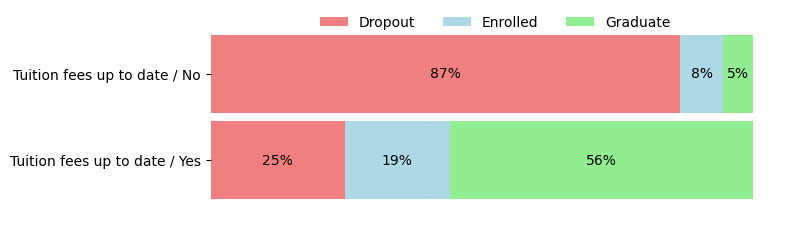

In [30]:
barh_compare(tuition_target_percentage, y_labels=['Tuition fees up to date / No','Tuition fees up to date / Yes'])

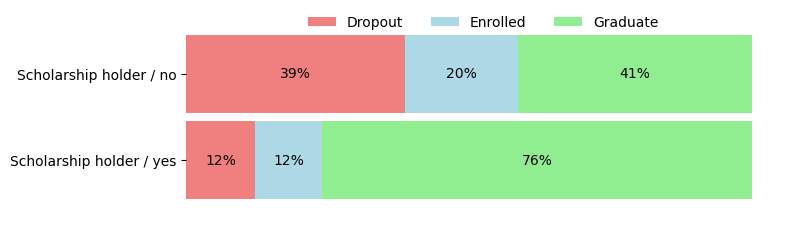

In [31]:
scholarship_target_percentage=group_by_div('Scholarship holder','Target')
barh_compare(scholarship_target_percentage, y_labels=['Scholarship holder / no', 'Scholarship holder / yes'])

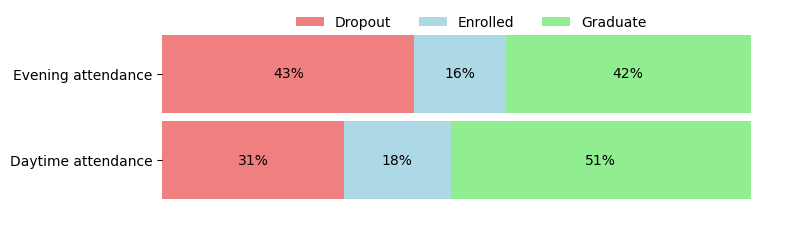

In [32]:
attendance_target_percentage=group_by_div('Daytime/evening attendance', 'Target')
barh_compare(attendance_target_percentage, y_labels=['Evening attendance', 'Daytime attendance'])

In [33]:
multi_collinearity=pd.concat([demographic_data, socioeconomic_data, macroeconomics_data, academic_data, first_semester, second_semester], axis=1)

In [34]:
cmap = sns.color_palette(['red', 'blue', 'green', 'yellow', 'purple', 'orange'], as_cmap=True)


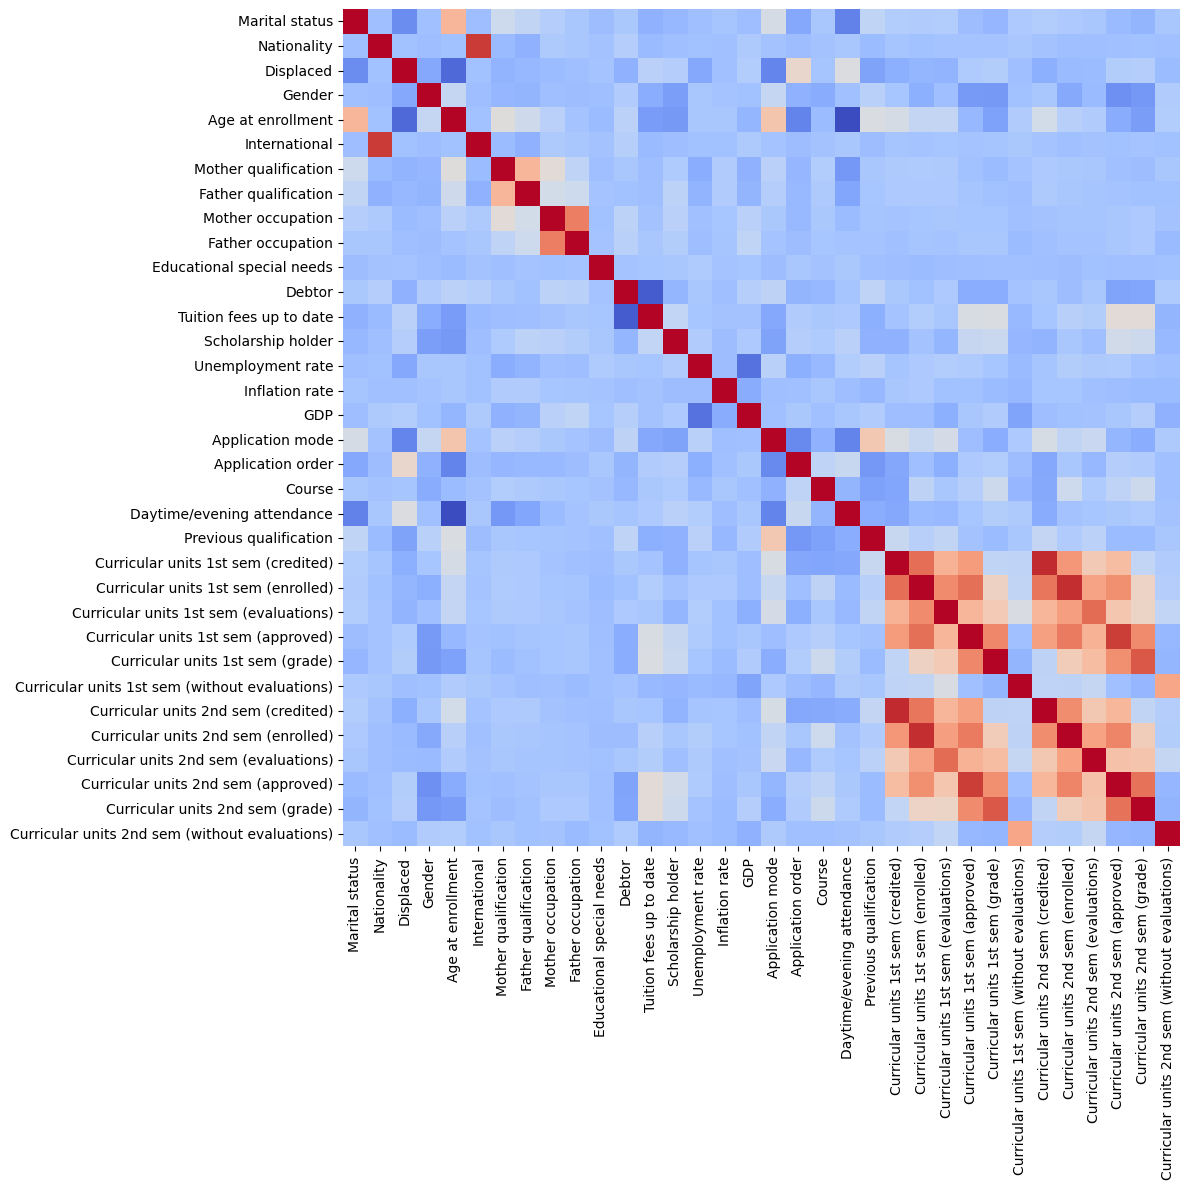

In [35]:
correlation_matrixs=multi_collinearity.corr()

plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrixs, annot=False , square=True, cbar=False,cmap='coolwarm')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
def sort_corr(corr_matrix, threshold):
    abs_corr=corr_matrix.abs()
    corr_series=abs_corr.unstack() #Easier manipulation and filters

    high_corr=corr_series[(corr_series>threshold) & (corr_series!=1)]
    sorted_corr=high_corr.sort_values(ascending=False)
    output=sorted_corr.reset_index()
    
    output.columns=['Feature 1', 'Feature 2', 'Correlation']
    output = output[output['Feature 1'] < output['Feature 2']] # Remove the duplicates
    return output           

In [37]:
top_correlation=sort_corr(correlation_matrixs, 0.7)
top_correlation

,Feature 1,Feature 2,Correlation
1,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944811
2,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942627
5,International,Nationality,0.911724
7,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
9,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
11,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778863
13,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
14,Curricular units 1st sem (approved),Curricular units 1st sem (enrolled),0.769083
17,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.760804
18,Curricular units 1st sem (enrolled),Curricular units 2nd sem (credited),0.753747


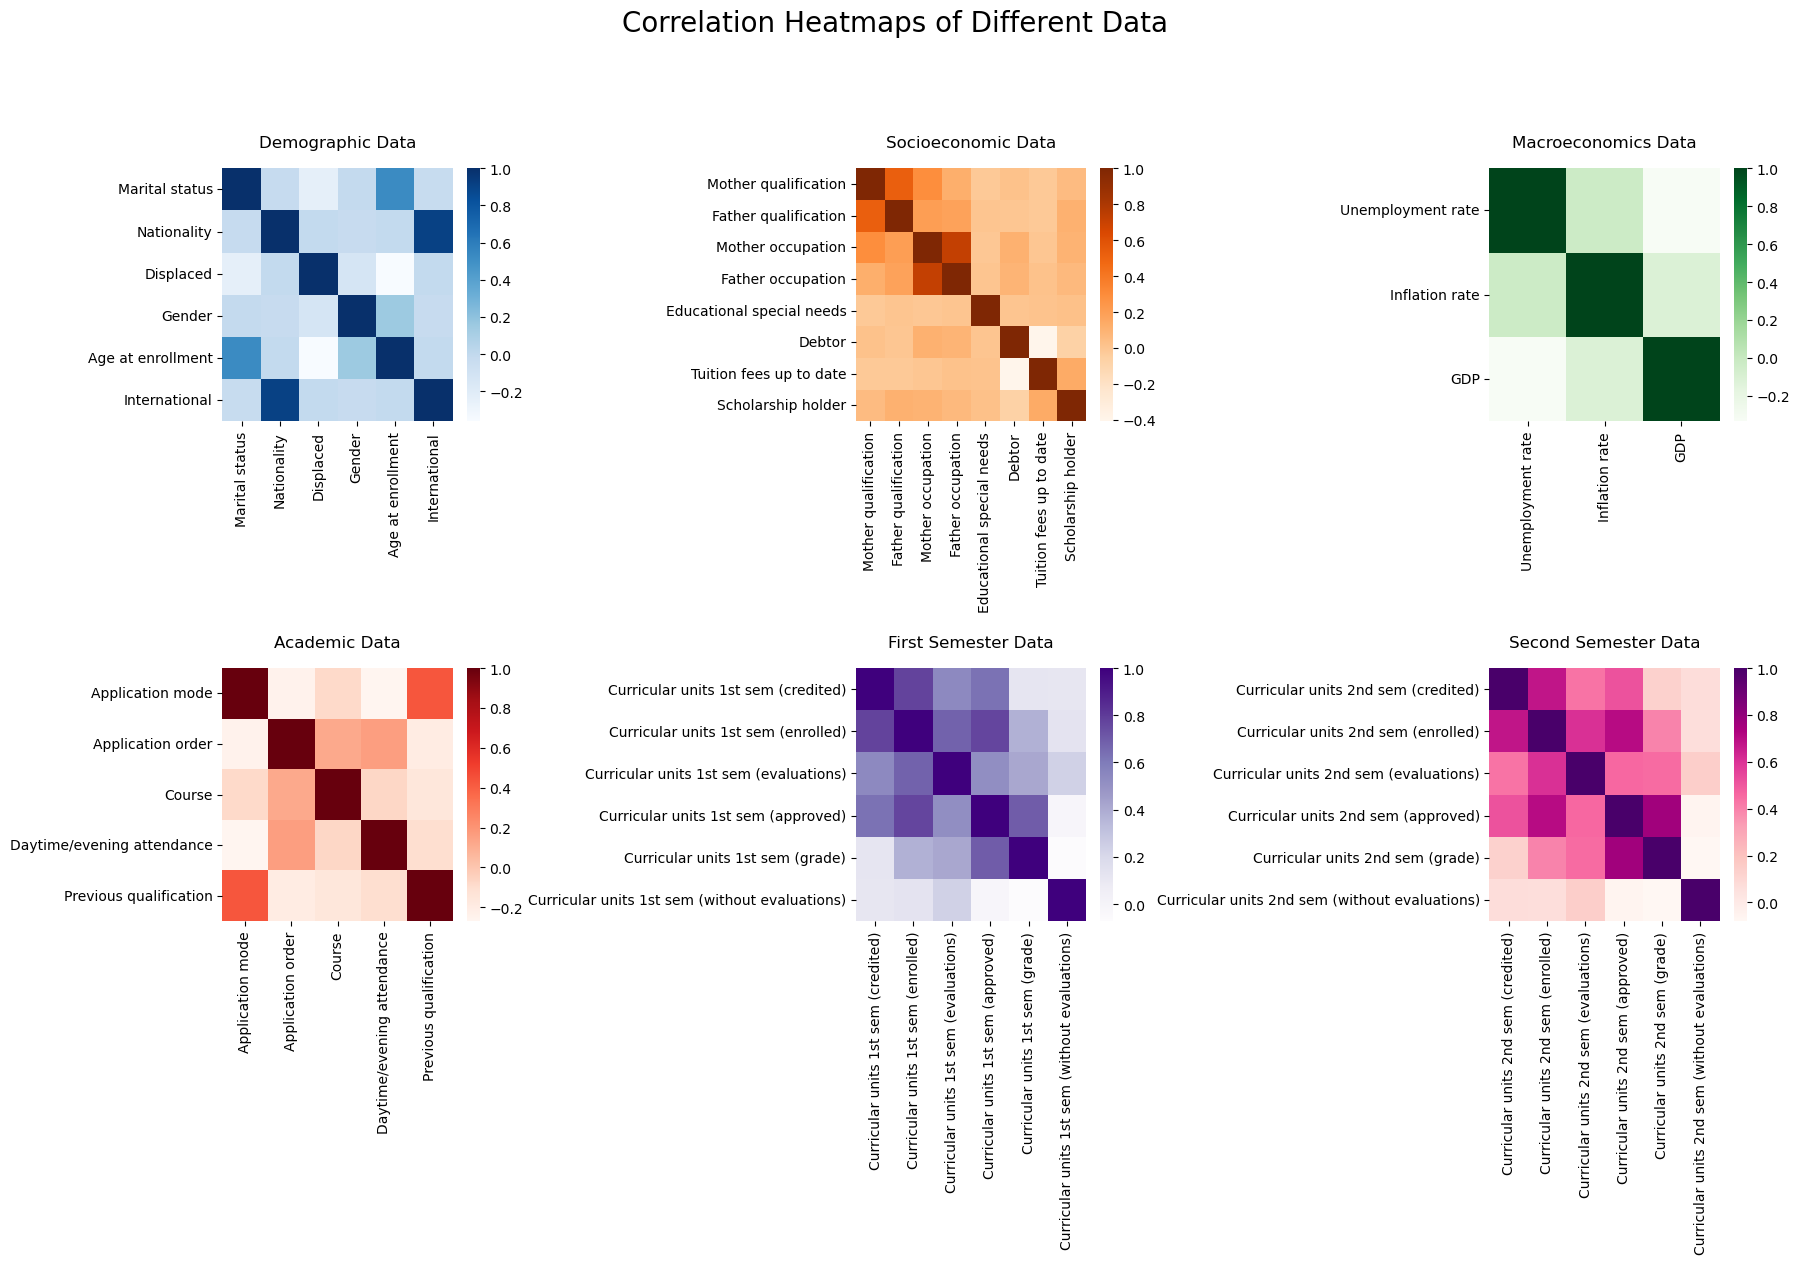

In [38]:
cols= [demographic_data, socioeconomic_data, macroeconomics_data, academic_data, first_semester, second_semester]
titles = ["Demographic Data", "Socioeconomic Data", "Macroeconomics Data", "Academic Data", "First Semester Data", "Second Semester Data"]
cmap_colors=['Blues', 'Oranges', 'Greens', 'Reds', 'Purples', 'RdPu']

fix, ax=plt.subplots(2, 3, figsize=(18, 12))
for index, value in enumerate(cols):
    r=index//3
    c=index%3
    ax_i=ax[r,c]
    sns.heatmap(cols[index].corr() ,cbar=True, annot=False, ax=ax_i, cmap=cmap_colors[index])
    ax_i.set_title(titles[index],y=1.05)

ax[0,2].tick_params(axis='x', rotation=90)
ax[0,2].tick_params(axis='y', rotation=0)
plt.suptitle('Correlation Heatmaps of Different Data', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

In [39]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import  LabelEncoder

encode=LabelEncoder()
df['Target_encoded']=encode.fit_transform(df['Target'])
df['Target_encoded']=df['Target_encoded'].astype('category')

In [43]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother qualification', 'Father qualification', 'Mother occupation',
       'Father occupation', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unem

In [ ]:
from sklearn.model_selection import  train_test_split

X=df.drop(['Target','Age Group', 'Target_encoded'], axis=1)
#X=multi_collinearity
y=df['Target_encoded']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from catboost import  CatBoostClassifier
from xgboost import  XGBClassifier
from lightgbm import LGBMClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models={
    'Random Forest':  RandomForestClassifier(),
    'CATBOOST': CatBoostClassifier(iterations=500, learning_rate=0.1, depth=8, verbose=0 ),
    'XGBOOST': XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.1, eval_metric='logloss'),
    'LIGHTGBM': LGBMClassifier(n_estimators=500, num_leaves=31, learning_rate=0.1, max_depth=8, verbose=-1),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model fitted succesfully")

Random Forest model fitted succesfully
CATBOOST model fitted succesfully
XGBOOST model fitted succesfully
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 34
[LightGBM] [Info] Start training from score -1.118878
[LightGBM] [Info] Start training from score -1.730653
[LightGBM] [Info] Start training from score -0.700806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [49]:
for name, model in models.items():
    print(f"{name} model score: {model.score(X_test, y_test)*100 :.2f}")

Random Forest model score: 78.42
CATBOOST model score: 77.06
XGBOOST model score: 77.40
LIGHTGBM model score: 77.29


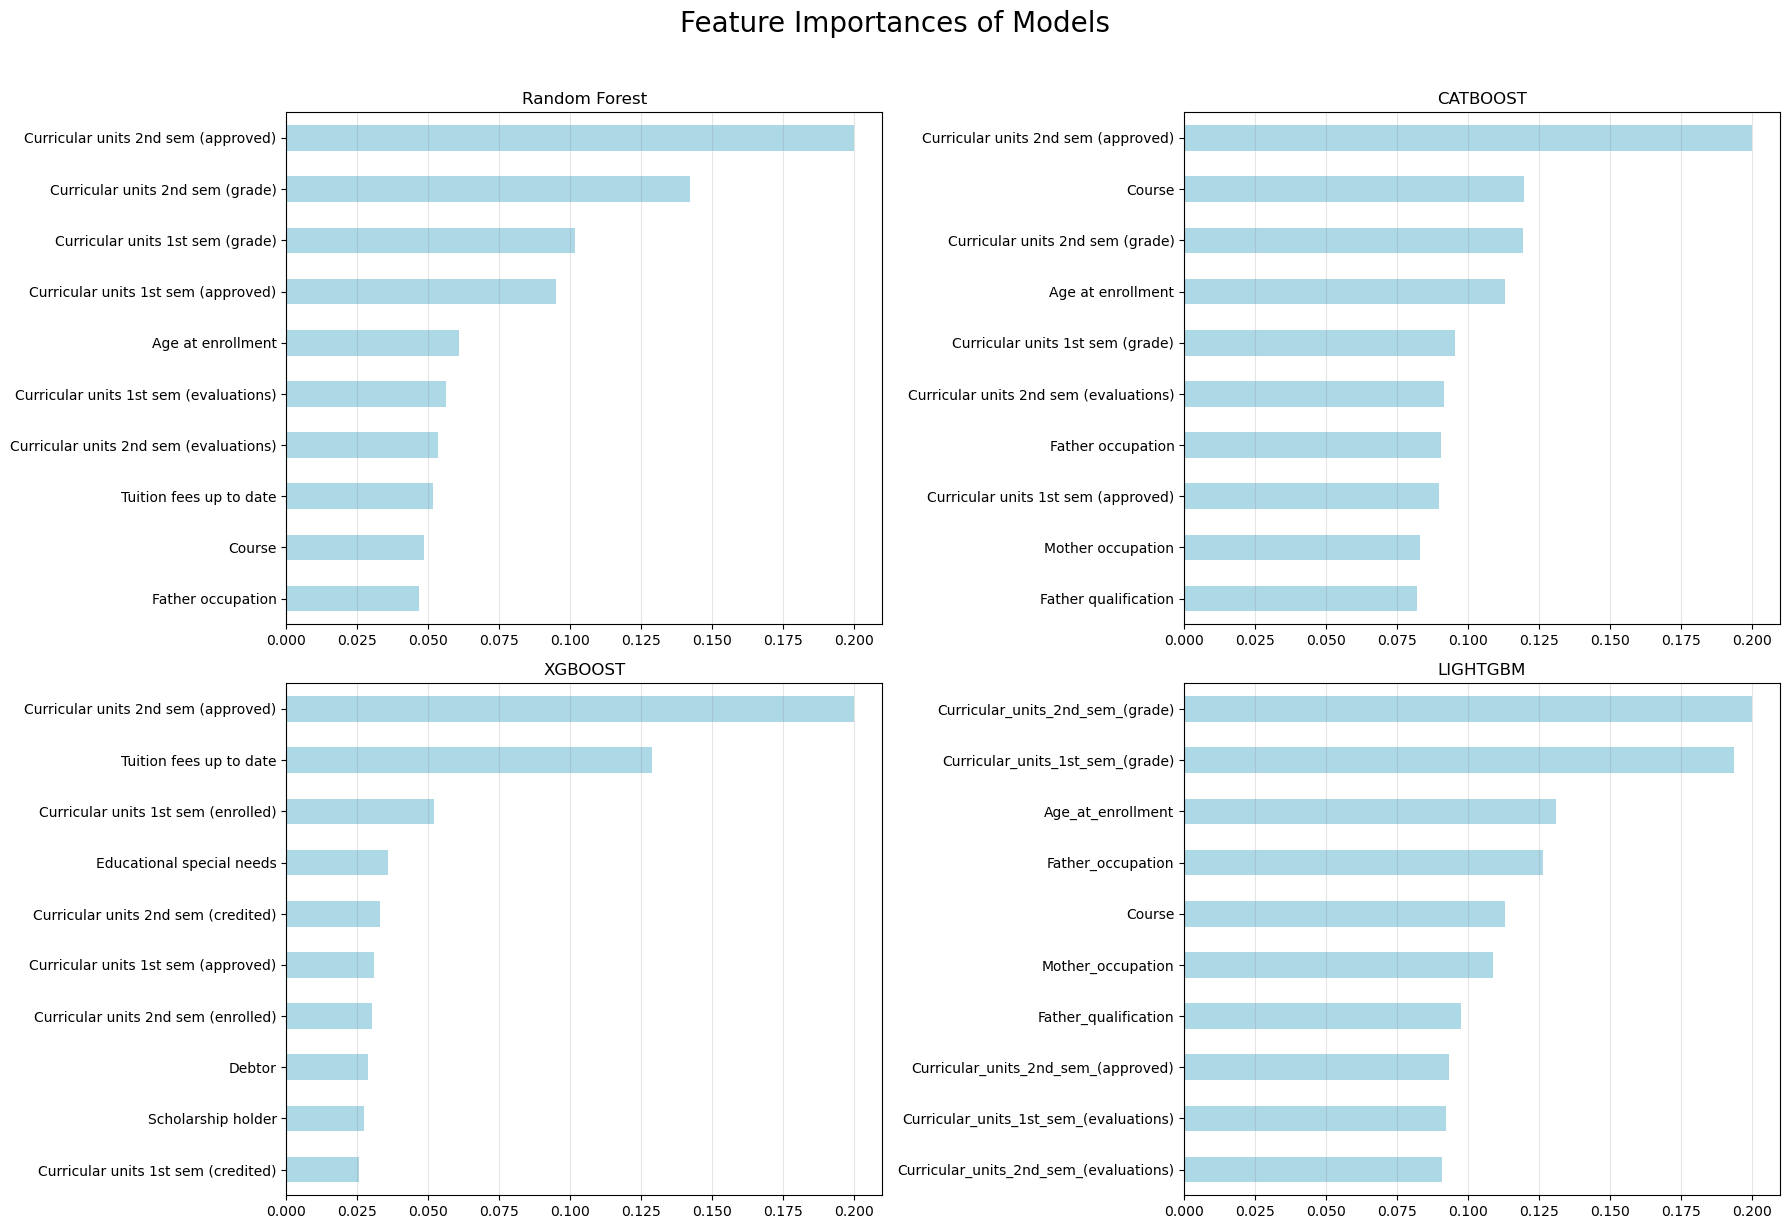

In [ ]:
fix, ax= plt.subplots(2,2, figsize=(18,12))
axes=ax.flatten()

for idx, (name, model) in enumerate(models.items()):
    if isinstance(model, CatBoostClassifier):
        feature_importances=model.get_feature_importance()
        feature_names=model.feature_names_
    else:
        feature_importances=model.feature_importances_   
        feature_names=model.feature_names_in_
    
    fi=pd.DataFrame(data=feature_importances, index=feature_names, columns=['Important'])

    fi['Important'] = fi['Important'] / fi['Important'].max()*0.2


    fi.sort_values('Important').tail(10).plot(kind='barh', ax=axes[idx], legend=False, title=name, color='lightblue')
    axes[idx].grid(axis='x', linestyle='-', color='grey', alpha=0.2)

#axes[-1].set_visible(False)
plt.suptitle('Feature Importances of Models', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred=model.predict(X_test) 
    print(f"Classification Report of {name} \n\n",classification_report(y_test, y_pred))
    

Classification Report of Random Forest 

               precision    recall  f1-score   support

           0       0.79      0.75      0.77       265
           1       0.49      0.30      0.38       148
           2       0.83      0.95      0.88       472

    accuracy                           0.78       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.76      0.78      0.77       885

Classification Report of CATBOOST 

               precision    recall  f1-score   support

           0       0.80      0.77      0.79       265
           1       0.51      0.37      0.43       148
           2       0.84      0.92      0.88       472

    accuracy                           0.79       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.77      0.79      0.78       885

Classification Report of XGBOOST 

               precision    recall  f1-score   support

           0       0.82      0.78      0.80       265
           1  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Model parameters
model_params = {
    'Random Forest': {
        'n_estimators': [200, 500],
        'max_depth': [15, 30],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 5]
    },
    'XGBOOST': {
        'n_estimators': [200, 500],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7]
    },
    'LIGHTGBM': {
        'n_estimators': [200, 500],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 63],
        'max_depth': [-1, 10]
    },
    'CATBOOST': {
        'iterations': [200, 500],
        'learning_rate': [0.05, 0.1],
        'depth': [8, 10]
    }
}

scores = []
for name, model in models.items():
    rs=RandomizedSearchCV(estimator=model, param_distributions=model_params[name], cv=5, random_state=42, return_train_score=False)
    
    rs.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best_score': rs.best_score_,
        'best_param': rs.best_params_,
    })
    print(f"{name} model tuned succesfully.")


Random Forest model tuned succesfully.


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CATBOOST model tuned succesfully.


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


XGBOOST model tuned succesfully.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 34
[LightGBM] [Info] Start training from score -1.118592
[LightGBM] [Info] Start training from score -1.702279
[LightGBM] [Info] Start training from score -0.711326
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 34
[LightG

In [ ]:
pd.set_option('display.max_colwidth', None)
ft= pd.DataFrame(data=scores, columns=['model', 'best_score', 'best_param'])
ft

,model,best_score,best_param
0,Random Forest,0.768864,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}"
1,CATBOOST,0.772822,"{'learning_rate': 0.05, 'iterations': 500, 'depth': 8}"
2,XGBOOST,0.769995,"{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}"
3,LIGHTGBM,0.772539,"{'num_leaves': 31, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1}"
